# Using UMAP for Clustering

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

c:\Users\peper\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(int)

c:\Users\peper\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


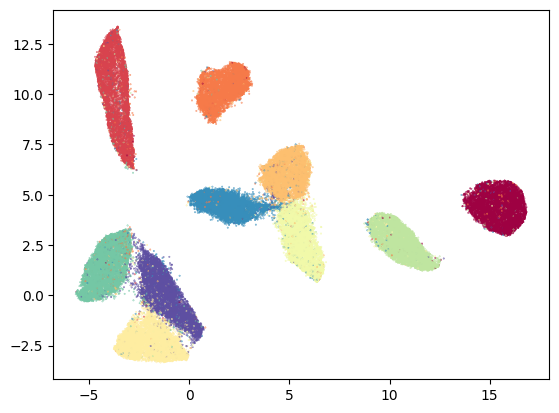

In [3]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(mnist.data)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=mnist.target.astype(int), s=0.1, cmap='Spectral');

## Traditional clustering

In [4]:
kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(mnist.data)

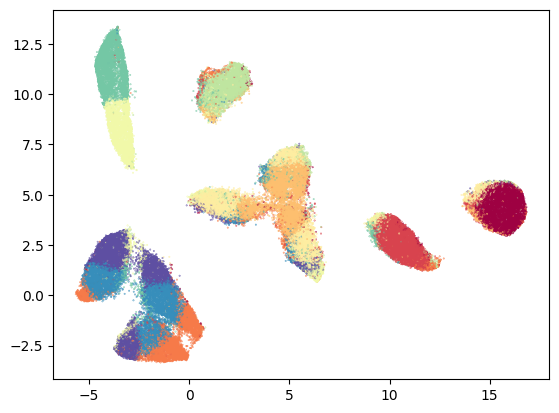

In [5]:
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s=0.1, cmap='Spectral');

In [6]:
(
    adjusted_rand_score(mnist.target, kmeans_labels),
    adjusted_mutual_info_score(mnist.target, kmeans_labels)
)

(0.3647486977805712, 0.4844999809034183)

In [7]:
lowd_mnist = PCA(n_components=50).fit_transform(mnist.data)
hdbscan_labels = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=500).fit_predict(lowd_mnist)

c:\Users\peper\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\peper\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


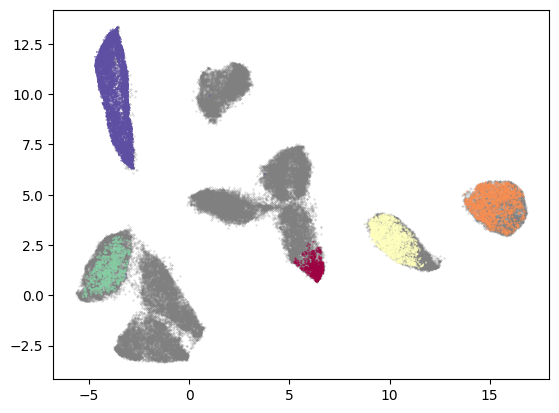

In [8]:
clustered = (hdbscan_labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=hdbscan_labels[clustered],
            s=0.1,
            cmap='Spectral');

In [9]:
(
    adjusted_rand_score(mnist.target, hdbscan_labels),
    adjusted_mutual_info_score(mnist.target, hdbscan_labels)
)

(0.05750108760118846, 0.32234403995789723)

In [10]:
clustered = (hdbscan_labels >= 0)
(
    adjusted_rand_score(mnist.target[clustered], hdbscan_labels[clustered]),
    adjusted_mutual_info_score(mnist.target[clustered], hdbscan_labels[clustered])
)

(0.9982557328519879, 0.9950063427768302)

In [11]:
np.sum(clustered) / mnist.data.shape[0]

0.1832

## UMAP enhanced clustering

In [22]:
clusterable_embedding = umap.UMAP(
    n_neighbors=5,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(mnist.data)

c:\Users\peper\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\peper\AppData\Local\Temp\ipykernel_7224\2657076671.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1], s=0.1, cmap='Spectral');


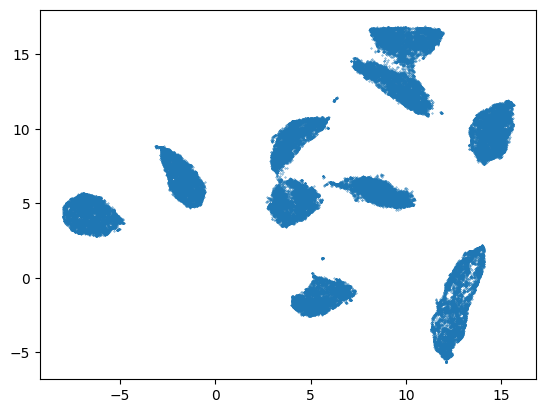

In [42]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1], s=0.1, cmap='Spectral');


c:\Users\peper\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\peper\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Estimated number of clusters: 10


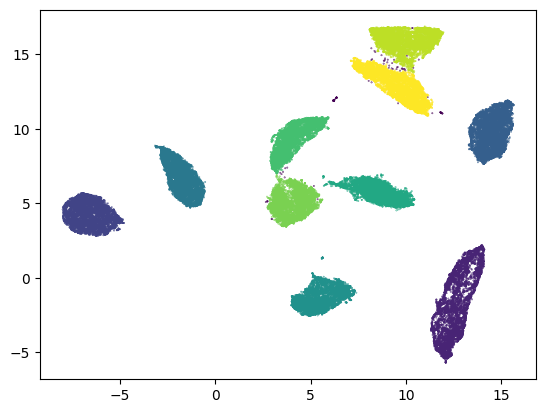

In [ ]:
labels = hdbscan.HDBSCAN(
    min_samples=1,
    min_cluster_size=500,
).fit_predict(clusterable_embedding)

# number of clusters
print(f'Estimated number of clusters: {len(set(labels)) - (1 if -1 in labels else 0)}')

# plot
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1], c=labels, cmap='viridis', s=0.1)

In [40]:
adjusted_rand_score(mnist.target, labels), adjusted_mutual_info_score(mnist.target, labels)

(0.9239028213628058, 0.908911727017879)

In [27]:
clustered = (labels >= 0)
(
    adjusted_rand_score(mnist.target[clustered], labels[clustered]),
    adjusted_mutual_info_score(mnist.target[clustered], labels[clustered])
)

(0.926297037302387, 0.9122879089951133)

In [28]:
np.sum(clustered) / mnist.data.shape[0]

0.9976571428571429